In [1]:
%%time
import pandas as pd
import json
from tqdm import tqdm
import asyncio
from utils import NoticeComparison

with open("../../data/conditor.json", "r") as f : 
    db = json.load(f)


indexor = {}
d = []
for notice in tqdm(db) : 
    sourceUid = notice["sourceUid"]
    indexor[sourceUid] = notice
    nearDuplicate = notice["nearDuplicates"]

    l = list(map(lambda y : y["sourceUid"], nearDuplicate))
    for x in l : 
        d.append((sourceUid, x))
print(len(d))
    #d.extend((list(map(lambda x,y : (x, y["sourceUid"]), [sourceUid]*len(nearDuplicate), nearDuplicate))))

100%|██████████| 312661/312661 [00:00<00:00, 476684.33it/s]779356
CPU times: user 7.59 s, sys: 2.17 s, total: 9.77 s
Wall time: 8.72 s



In [2]:
from time import time
# Class for compute comparison
def getNoticeFromSourceUid(sourceUid, indexor = indexor): 
    if not isinstance(sourceUid, str) : 
        sourceUid = str(sourceUid)
    try : 
        return indexor[sourceUid]
    except : 
        return None
x = "hal$halshs-01617075"
a = time()
t = getNoticeFromSourceUid(x, indexor)
print(time() - a)
print(x)
print(t)

7.987022399902344e-05
hal$halshs-01617075
{'nearDuplicates': [{'sourceUid': 'hal$halshs-01626607', 'similarityRate': 0.879, 'source': 'hal', 'type': 'Chapitre', 'idConditor': '19LWuwBf6X20fSweU7XqsyJdb'}], 'pageRange': '208-209', 'sourceUid': 'hal$halshs-01617075', 'issn': [], 'documentType': ['COUV'], 'isbn': ['ISBN: 978-2-271-11907-0'], 'typeConditor': 'Chapitre', 'eissn': [], 'title': {'default': 'Urbanization and the Ocean', 'monography': 'The Ocean revealed', 'journal': '', 'en': 'Urbanization and the Ocean', 'fr': '', 'meeting': ''}, 'publicationDate': '2017-09-28', '_score': 1.8790301, '_sort': [5620017]}


In [3]:
from time import time
def function(json_object, x):
    return [obj for obj in json_object if obj['sourceUid']==x]
a = time()
t1 = function(db, x)
print(time() -a )


def function2(x, dico) : 
    try :
        return dico[x] 
    except :
        return None

a = time()
t2 = function2(x, indexor)
print(time() -a )
        

0.07207322120666504
7.700920104980469e-05


In [46]:
indexor['hal$hal-01921179']

{'volume': '9',
 'nearDuplicates': [{'sourceUid': 'pubmed$30013886',
   'similarityRate': 0.8901,
   'source': 'pubmed',
   'type': 'Article',
   'idConditor': 'kTjmL7XMbKVWBYIKST7p5eLDM'}],
 'pageRange': '1926 - 1939',
 'sourceUid': 'hal$hal-01921179',
 'issn': ['2190-4286'],
 'documentType': ['ART'],
 'isbn': [],
 'typeConditor': 'Article',
 'eissn': [],
 'title': {'default': 'A differential Hall effect measurement method with sub-nanometre resolution for active dopant concentration profiling in ultrathin doped Si 1− x Ge x and Si layers',
  'monography': '',
  'journal': 'Beilstein Journal of Nanotechnology',
  'en': 'A differential Hall effect measurement method with sub-nanometre resolution for active dopant concentration profiling in ultrathin doped Si 1− x Ge x and Si layers',
  'fr': '',
  'meeting': ''},
 'publicationDate': '2018-07',
 'doi': '10.3762/bjnano.9.184',
 '_score': 1.8785663,
 '_sort': [1164867]}

In [5]:
%%time
t = []
for i in range(100) : 
    t.append(get_validation(d[i][0], d[i][1]))

CPU times: user 7.25 s, sys: 3.06 ms, total: 7.25 s
Wall time: 7.27 s


In [17]:
import pandas as pd
filename = "../../data/conditor.json"
df = pd.read_json(filename)
print(df.shape)

(312661, 81)


In [13]:
import pandas as pd
data = pd.read_csv("resultats.tsv", sep = "\t")
print(data.shape)

(779356, 5)


In [15]:
data[['validation', 'comment']].groupby(["validation"]).count()/len(data)

,comment
validation,
-1,0.466892
0,0.204393
1,0.048702
99,0.280013


In [4]:
from utils import checkPageRange, getNoticeFromSourceUid

checkPageRange("16-31", '16   - 31')
print(getNoticeFromSourceUid("hal$hal-02352531", indexor))
getNoticeFromSourceUid("hal$hal-02349902", indexor)
#16 - 30".split("-")

{'pageRange': '16-31',
 'issue': '1',
 'documentType': ['ART'],
 'isbn': [],
 'typeConditor': 'Article',
 'eissn': [],
 'title': {'default': 'Hybolites Revisited',
  'monography': '',
  'journal': 'recent patents on anti-infective drug discovery',
  'en': 'Hybolites Revisited',
  'fr': '',
  'meeting': ''},
 'volume': '11',
 'nearDuplicates': [{'sourceUid': 'hal$hal-02352531',
   'similarityRate': 0.986,
   'source': 'hal',
   'type': 'Article',
   'idConditor': 'r9R5Dny8CRkISi9gvn4UEvyYs'}],
 'sourceUid': 'hal$hal-02349902',
 'issn': [],
 'publicationDate': '2016-05-11',
 'doi': '10.2174/1574891X11666160406121706',
 '_score': 1.8782449,
 '_sort': [7445443]}

In [10]:
filename = "../../data/conditor.json"
with open(filename, "r", encoding = "utf8") as f : 
    db = json.load(f)

In [44]:
import json
import pandas as pd

with open("result.csv", 'r', encoding = "utf8") as f : 
    d = []
    for line in f: 
        line = json.loads(line)
        d.append(line)

df = pd.DataFrame(d)
print(df.head())
print(df.shape)

              sourceUid  quality
0      hal$hal-01905838    0.500
1  hal$medihal-01285684    0.286
2      hal$hal-01551223    0.357
3      hal$hal-01913189    0.500
4      hal$hal-02328920    0.357
(1447, 2)


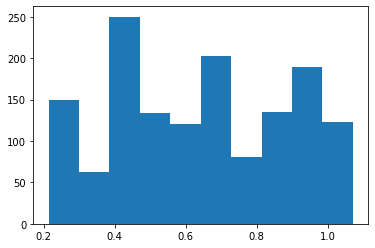

In [45]:
import matplotlib.pyplot as plt

plt.hist(df.quality)
plt.show()

In [39]:
goodData = df[df.quality >0.799]

In [3]:
from utils import checkPageRange, NoticeComparison

checkPageRange("16-31", "16 - 31")
s1 = "hal$hal-02352531"
s2 = "hal$hal-02349902"
n1 = getNoticeFromSourceUid(s1, indexor)
n2 = getNoticeFromSourceUid(s2, indexor)
comp = NoticeComparison(n1, n2)
comp.run()
comp.validation_dict

{'id': 0, 'page': 1, 'vol': -1, 'source': 1, 'title': -1}

In [53]:
from utils import normalized
import re

#nlp = spacy.load("en_core_web_sm")
words = []
freq = {}
n = {}
for notice in db : 
    default = notice['title']['default']
    nearDuplicatesLength = len(notice["nearDuplicates"])
    default = re.sub(r"[^\w\s]", " ", default)
    if len(default.split())<2 :
        titleSplit =  default.split()
        for word in titleSplit : 
            n_word = normalized(word)
            n[word] = n_word
            if n_word in freq : 
                freq[n_word].append(len(words))
            else : 
                freq[n_word] = [len(words)]
        words.extend([n_word])

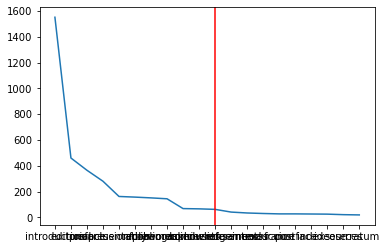

In [64]:
from collections import Counter
import matplotlib.pyplot as plt

count = Counter(words)
bar = [x[0] for x in count.most_common(20)]
heigth = [x[1] for x in count.most_common(20)]
plt.plot(bar, heigth)#, orientation="vertical")
plt.axvline(x=10, color = "r")
plt.plot()
plt.show()

In [67]:
count.most_common(50)

[('introduction', 1552),
 ('editorial', 461),
 ('preface', 366),
 ('conclusion', 281),
 ('presentation', 163),
 ('reply', 158),
 ('foreword', 152),
 ('bibliographie', 145),
 ('remerciements', 69),
 ('conclusions', 67),
 ('acknowledgements', 63),
 ('references', 42),
 ('annexes', 35),
 ('introduccion', 31),
 ('france', 28),
 ('postface', 28),
 ('index', 27),
 ('idees', 26),
 ('sources', 22),
 ('erratum', 20),
 ('liminaire', 20),
 ('response', 18),
 ('finance', 18),
 ('corrigendum', 18),
 ('prologo', 16),
 ('predislovie', 16),
 ('manufacturing', 16),
 ('energy', 16),
 ('mining', 16),
 ('bibliography', 15),
 ('transport', 15),
 ('livres', 14),
 ('abbreviations', 14),
 ('overview', 14),
 ('epilogue', 13),
 ('glossaire', 13),
 ('acronyms', 13),
 ('abreviations', 13),
 ('discussion', 12),
 ('resumen', 12),
 ('glossary', 10),
 ('reziume', 9),
 ('population', 9),
 ('perspectives', 9),
 ('bibliografia', 9),
 ('commentary', 9),
 ('ouverture', 8),
 ('tmhyd', 8),
 ('background', 8),
 ('summary', 8

In [69]:
notice["nearDuplicates"]

[{'sourceUid': 'hal$tel-01023059',
  'similarityRate': 0.8909,
  'source': 'hal',
  'type': 'Thèse',
  'idConditor': 'hG_b90JGut6Xd3VAgLnudGW9Q'}]